In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Load Image

In [3]:
img1 = cv2.imread("puppy.jpg", 0)

### Rotate image

In [4]:
(h1, w1) = img1.shape[:2]
center1 = (w1 / 2, h1 / 2)

M1 = cv2.getRotationMatrix2D(center1, 30, 1.0)
rotated_img1 = cv2.warpAffine(img1, M1, (w1, h1))

### Calculate Histogram

In [14]:
hist1 = cv2.calcHist([img1], [0], None, [64], [0, 256])
cv2.normalize(hist1, hist1)

rotated_hist1 = cv2.calcHist([rotated_img1[rotated_img1 != 0]], [0], None, [64], [0, 256])
rotated_hist1 = cv2.normalize(rotated_hist1, rotated_hist1)

### Plot Images with Histogram

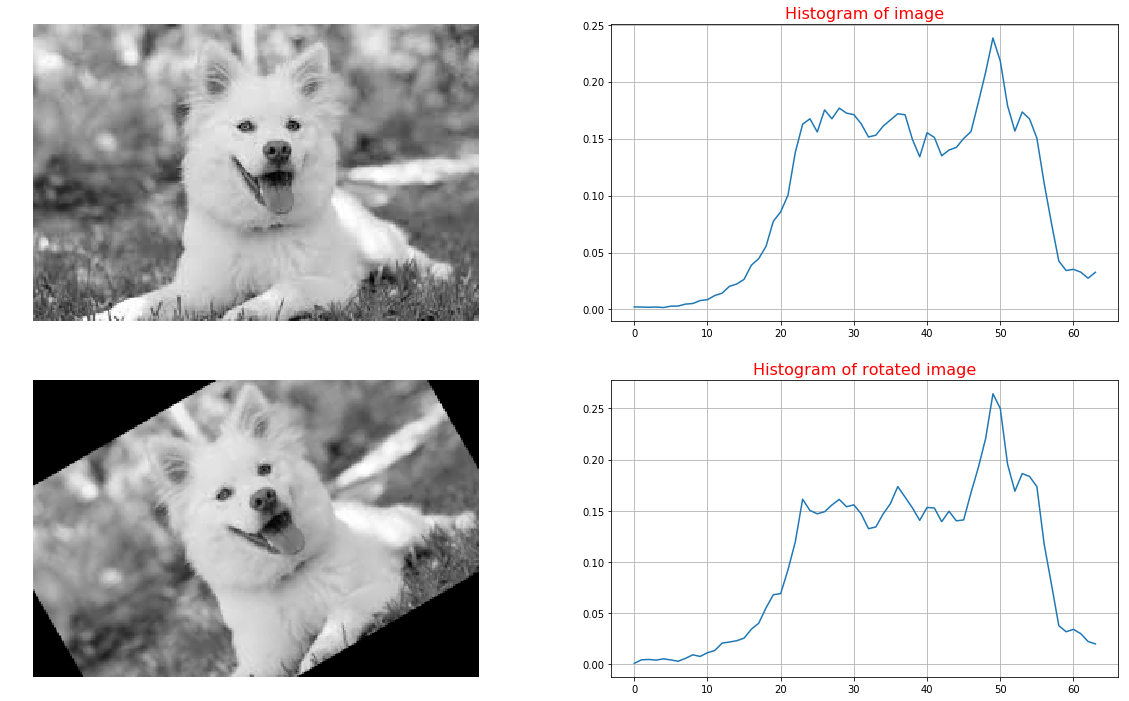

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
ax1[0].set_axis_off()
ax1[0].imshow(img1, cmap='gray')
ax1[1].grid()
ax1[1].set_title('Histogram of image', fontsize=16, color="red")
ax1[1].plot(hist1)
ax2[0].set_axis_off()
ax2[0].imshow(rotated_img1, cmap='gray')
ax2[1].grid()
ax2[1].set_title('Histogram of rotated image', fontsize=16, color="red")
ax2[1].plot(rotated_hist1)
plt.show()

### Show distance between image and rotated image histogram

In [16]:
d_rotated = cv2.compareHist(hist1, rotated_hist1, method=cv2.HISTCMP_CHISQR)
d = cv2.compareHist(hist1, hist1, method=cv2.HISTCMP_CHISQR)

print("Same histogram CHISQR distance: {}".format(d))
print("Rotated CHISQR distance: {}".format(d_rotated))

Same histogram CHISQR distance: 0.0
Rotated CHISQR distance: 0.08278842726473555
